In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('AutoData (1).csv')
data.head(5)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 25)

In [5]:
data.dtypes

symboling             int64
make                 object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
data.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

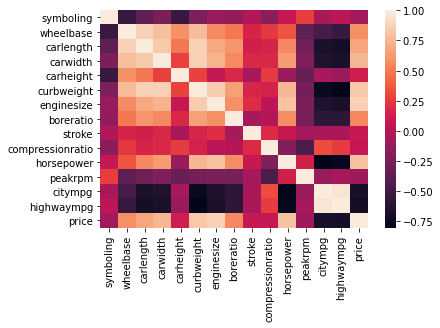

In [10]:

sns.heatmap(data.corr())

In [3]:
data.drop(['make','carlength','carwidth','carbody','carheight','enginelocation','aspiration','drivewheel'],axis=1, inplace=True)

In [14]:
data.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

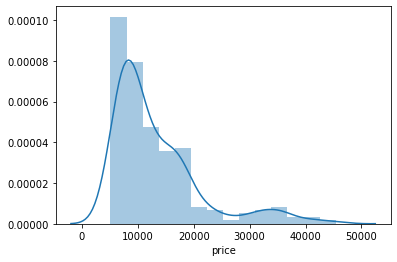

In [22]:
sns.distplot(data['price'])

In [27]:
data.head(5)

,symboling,fueltype,doornumber,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,two,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,two,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,two,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,four,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,four,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['fueltype']=label_encoder.fit_transform(data['fueltype'])
data['fuelsystem']=label_encoder.fit_transform(data['fuelsystem'])
data['enginetype']=label_encoder.fit_transform(data['enginetype'])
data['cylindernumber']=label_encoder.fit_transform(data['cylindernumber'])
data['doornumber']=label_encoder.fit_transform(data['doornumber'])


In [41]:
data.head(5)

,symboling,fueltype,doornumber,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,88.6,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,88.6,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,94.5,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,99.8,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,99.4,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [5]:
X = data.drop('price',axis=1)
y = data['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
linear=LinearRegression()

In [47]:
linear.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred =linear.predict(X_test)

In [55]:
print('coefficient is',linear.coef_)
print(" ")
print('intercept is',linear.intercept_)

coefficient is [ 7.52768224e+02  1.50446785e+03 -7.92098669e+02  2.32783075e+02
  1.40344195e+00  4.52330613e+02 -9.01158011e+02  1.02141202e+02
 -1.85030867e+02 -6.23191954e+02 -2.62501326e+03  4.15808288e+02
  4.08303830e+01  2.53209841e+00 -2.02636216e+02  1.26899103e+01]
 
intercept is -32975.119788660624


In [57]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)*100

75.68838769252922

In [88]:
from sklearn.linear_model import SGDRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [89]:
data.head()

,symboling,fueltype,doornumber,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,88.6,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,88.6,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,94.5,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,99.8,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,99.4,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
scaler = MinMaxScaler()
model = LinearRegression()


In [92]:
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)

D:\ASSIGNMENT\anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [93]:
rfe.fit(X_train1,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [94]:
X_train.columns[rfe.support_]

Index(['cylindernumber', 'enginesize', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg'],
      dtype='object')

In [95]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False False False False False False  True  True False False  True  True
  True  True  True False]
Feature Ranking: [ 5  6  9  2  3  4  1  1  7  8  1  1  1  1  1 10]


In [97]:
X = data[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [99]:
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [100]:
y_pred1 = LR.predict(X_train)


In [106]:
print(LR.intercept_)


-20658.419195104878


In [107]:
print(LR.coef_)

[ 2.37727309e+01  2.31543530e+00 -2.92917424e+03 -2.56375397e+02
  1.20048878e+02  1.72227678e+02  3.24266517e+02]
